# Problem Statement

### Business Use Case

There has been a revenue decline for a Portuguese bank and they would like to know what actions to take. After investigation, they found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients.

### Data Science Problem Statement

Predict if the client will subscribe to a term deposit based on the analysis of the marketing campaigns the bank performed.

### Evaluation Metric
We will be using AUC - Probability to discriminate between subscriber and non-subscriber. 

### Objective of this template notebook

The main objective of this template is to take you through the entire working pipeline that you may follow while approaching a Machine Learning problem.

We will be defining a task to be performed and write the code to solve the task.

__The tasks performed below should serve as a good guide regarding the steps that you should go about a Machine Learning Problem. But kindly do not restrict yourself to only the tasks that have been performed in this notebook and feel free to bring your ideas,skills and strategies and implement them as well.__


### Word of caution

This template is just an example of a data-science pipeline, every data science problem is unique and there are multiple ways to tackle them. 

![Classification vs Regression](../images/classification.png)

# Understanding the dataset

**Data Set Information**

The data is related to direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be subscribed ('yes') or not ('no') subscribed.

There are two datasets:
`train.csv` with all examples (32950) and 14 inputs including the target feature, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]

`test.csv` which is the test data that consists  of 8238 observations and 13 features without the target feature

Goal:- The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

**Features**

|Feature|Feature_Type|Description|
|-----|-----|-----|
|age|numeric|age of a person|  
|job |Categorical|type of job ('admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')|  
|marital|categorical|marital status ('divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)|  
|education|categorical| ('basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown') | 
|default|categorical| has credit in default? ('no','yes','unknown')|  
|housing|categorical| has housing loan? ('no','yes','unknown')|  
|loan|categorical| has personal loan? ('no','yes','unknown')|  
|contact|categorical| contact communication type ('cellular','telephone')|  
|month|categorical| last contact month of year ('jan', 'feb', 'mar', ..., 'nov', 'dec')| 
|day_of_week|categorical| last contact day of the week ('mon','tue','wed','thu','fri')|  
|duration|numeric| last contact duration, in seconds . Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no')|
|campaign|numeric|number of contacts performed during this campaign and for this client (includes last contact)|   
|poutcome|categorical| outcome of the previous marketing campaign ('failure','nonexistent','success')|  

**Target variable (desired output):**  

|Feature|Feature_Type|Description|
|-----|-----|-----|
|y | binary| has the client subscribed a term deposit? ('yes','no')|

## Categorical and Numeric Data

### Categorical Data
Categorical data is a type of data that can be stored into groups or categories with the aid of names or labels. 

For example, gender is a categorical data because it can be categorized into male and female according to some unique qualities possessed by each gender. 

### Numeric Data 
Numerical data is a type of data that is expressed in terms of numbers rather than natural language descriptions. Ex: Person's height, weight, IQ etc. 

###  Importing necessary libraries

The following code is written in Python 3.x. Libraries provide pre-written functionality to perform necessary tasks.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

###  Importing necessary libraries

The following code is written in Python 3.x. Libraries provide pre-written functionality to perform necessary tasks.

In [3]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns',None)
import six
import sys
sys.modules['sklearn.externals.six'] = six

## Data Loading and Cleaning




### Load and Prepare dataset

- In this task, we'll load the dataframe in pandas, drop the unnecessary columns and display the top five rows of the dataset.

In [8]:
# accessing to the folder where the file is stored
path = '../data/new_train2.csv'

# Load the dataframe
dataframe = pd.read_csv(path)

print('Shape of the data is: ',dataframe.shape)

dataframe.head()



Shape of the data is:  (32950, 14)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,failure,no
2,55,retired,married,basic.4y,no,no,no,cellular,jul,mon,550,1,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,nonexistent,no
4,55,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,nonexistent,no


### Check Numeric and Categorical Features

If you are familiar with machine learning, you will know that a dataset consists of numerical and categorical columns.

Looking at the dataset, we think we can identify the categorical and continuous columns in it. Right? But it might also be possible that the numerical values are represented as strings in some feature. Or the categorical values in some features might be represented as some other datatypes instead of strings. Hence it's good to check for the datatypes of all the features.


In [9]:

# IDENTIFYING NUMERICAL FEATURES

numeric_data = dataframe.select_dtypes(include=np.number) # select_dtypes selects data with numeric features
numeric_col = numeric_data.columns                                                                # we will store the numeric features in a variable

print("Numeric Features:")
print(numeric_data.head())
print("===="*20)

Numeric Features:
   age  duration  campaign
0   49       227         4
1   37       202         2
2   55       550         1
3   36       120         2
4   55       368         2


In [10]:

# IDENTIFYING CATEGORICAL FEATURES
categorical_data = dataframe.select_dtypes(exclude=np.number) # we will exclude data with numeric features
categorical_col = categorical_data.columns                                                                              # we will store the categorical features in a variable


print("Categorical Features:")
print(categorical_data.head())
print("===="*20)


Categorical Features:
            job   marital          education  default housing loan    contact  \
0   blue-collar   married           basic.9y  unknown      no   no   cellular   
1  entrepreneur   married  university.degree       no      no   no  telephone   
2       retired   married           basic.4y       no      no   no   cellular   
3        admin.   married  university.degree       no     yes   no  telephone   
4       retired  divorced  university.degree       no      no   no   cellular   

  month day_of_week     poutcome    y  
0   nov         wed  nonexistent   no  
1   nov         wed      failure   no  
2   jul         mon  nonexistent  yes  
3   may         mon  nonexistent   no  
4   jun         tue  nonexistent   no  


In [11]:
# CHECK THE DATATYPES OF ALL COLUMNS:
    
print(dataframe.dtypes)


age             int64
job            object
marital        object
education      object
default        object
housing        object
loan           object
contact        object
month          object
day_of_week    object
duration        int64
campaign        int64
poutcome       object
y              object
dtype: object


### Check for Class Imbalance

Class imbalance occurs when the observations belonging to one class in the target are significantly higher than the other class or classes. A class distribution of **80:20 or greater** is typically considered as an imbalance for a binary classification. 

Since most machine learning algorithms assume that data is equally distributed, applying them on imbalanced data often results in bias towards majority classes and poor classification of minority classes. Hence we need to identify & deal with class imbalance. 

The code below that takes the target variable and outputs the distribution of classes in the target.

In [12]:
# we are finding the percentage of each class in the feature 'y'
class_values = (dataframe['y'].value_counts()/dataframe['y'].value_counts().sum())*100
print(class_values)

no     88.734446
yes    11.265554
Name: y, dtype: float64



### Observations : 
- The class distribution in the target is ~89:11. This is a clear indication of imbalance.
- By now you should be well familiar with the methods on how to deal with the imbalance in data.

###  Univariate analysis of Categorical columns

Univariate analysis means analysis of a single variable. It’s mainly describes the characteristics of the variable.

If the variable is categorical we can use either a bar chart or a pie chart to find the distribution of the classes in the variable.

- The code plots the frequency of all the values in the categorical variables. 


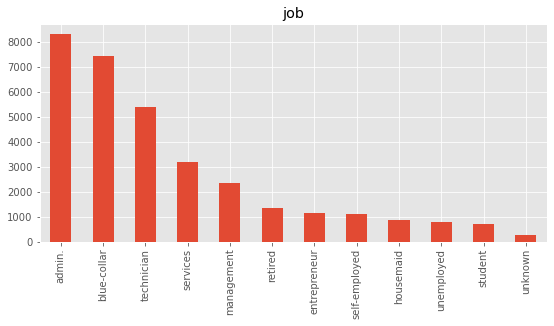

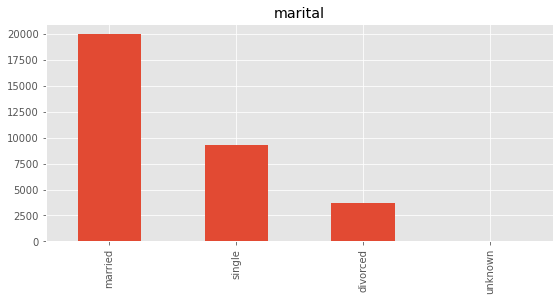

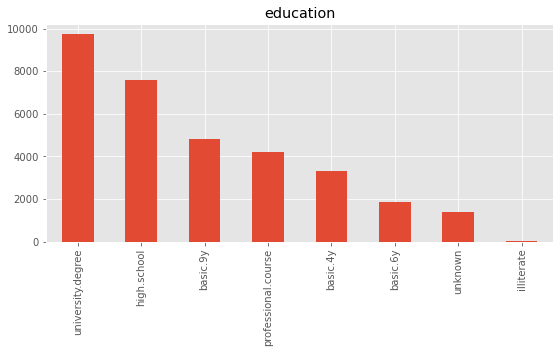

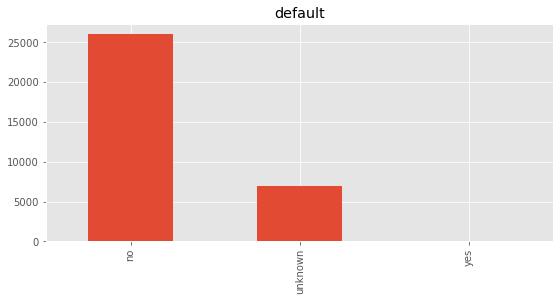

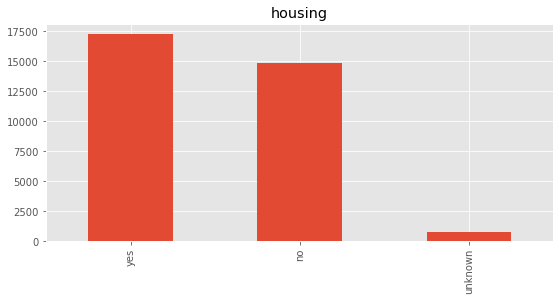

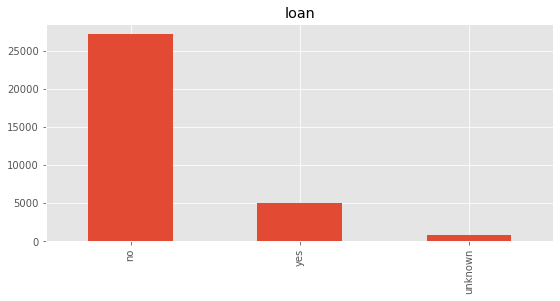

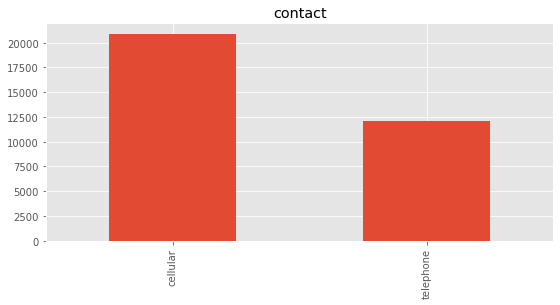

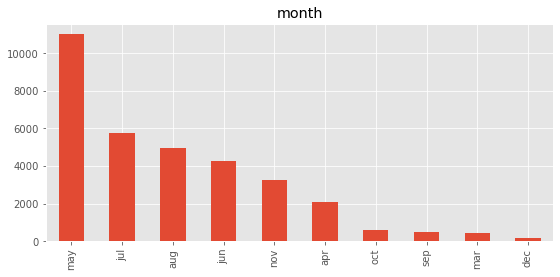

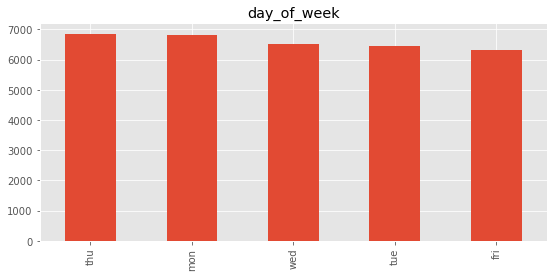

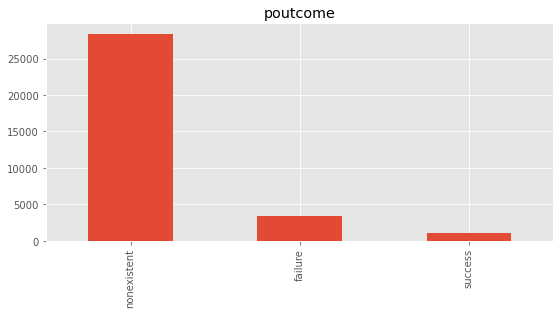

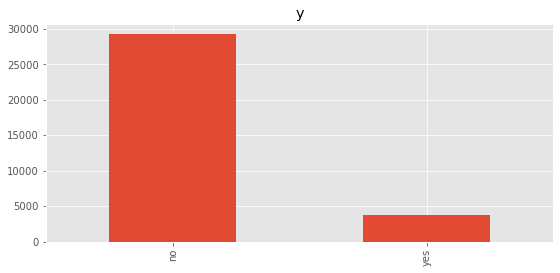

In [13]:
# Selecting the categorical columns
categorical_col = dataframe.select_dtypes(include=['object']).columns
plt.style.use('ggplot')
# Plotting a bar chart for each of the cateorical variable
for column in categorical_col:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    dataframe[column].value_counts().plot(kind='bar')
    plt.title(column)

### Observations :

From the above visuals, we can make the following observations: 
- The top three professions that our customers belong to are - administration, blue-collar jobs and technicians.
- A huge number of the customers are married.
- Majority of the customers do not have a credit in default
- Many of our past customers have applied for a housing loan but very few have applied for personal loans.
- Cell-phones seem to be the most favoured method of reaching out to customers.
- Many customers have been contacted in the month of **May**.
- The plot for the target variable shows heavy imbalance in the target variable. 
- The missing values in some columns have been represented as `unknown`. `unknown` represents missing data. In the next task, we will treat these values.  

### Imputing `unknown` values of categorical columns 

In the previous task we have seen some categorical variables have a value called `unknown`. `unknown` values are a kind of missing data.
Depending on the use case, we can decide how to deal with these values. One method is to directly impute them with the mode value of respective columns.

- The code below imputes the value `unknown` in the categorical columns with the mode value of that column. You can modify this function to replace any unwanted value(for e.g `NaN` value) in a column with a value of your choice.

In [14]:
# Impute mising values of categorical data with mode
for column in categorical_col:
    mode = dataframe[column].mode()[0]
    dataframe[column] = dataframe[column].replace('unknown',mode)


### Univariate analysis of Continuous columns
Just like for categorical columns, by performing a univariate analysis on the continuous columns, we can get a sense of the distrbution of values in every column and of the outliers in the data. Histograms are great for plotting the distribution of the data and boxplots are the best choice for visualizing outliers. 

- The code below plots a histogram of all the continuous features and other that plots a boxplot of the same.

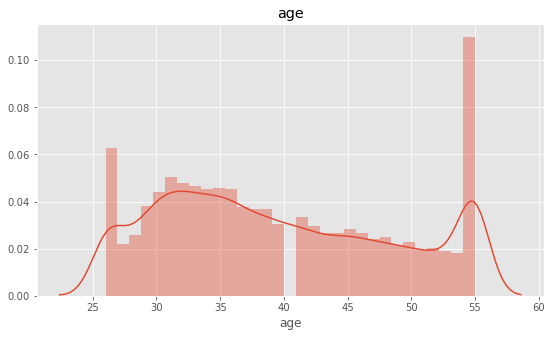

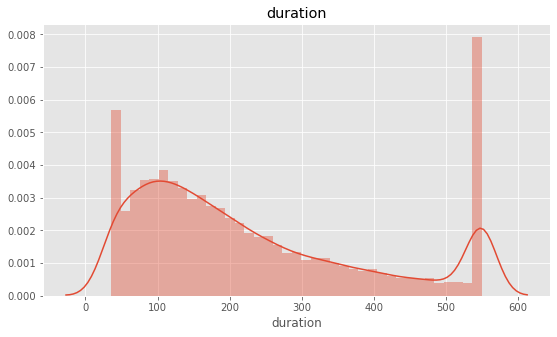

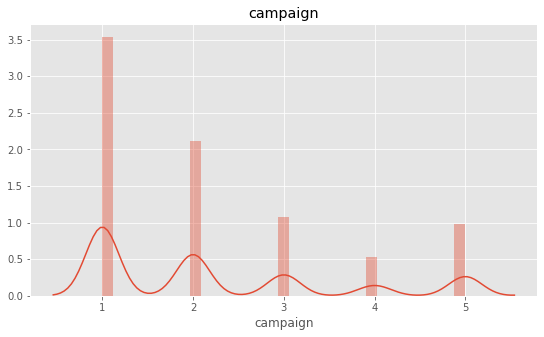

In [15]:
for column in numeric_col:
    plt.figure(figsize=(20,5))
    plt.subplot(121)
    sns.distplot(dataframe[column])
    plt.title(column)

### Bivariate Analysis - Categorical Columns

Bivariate analysis involves checking the relationship between two variables simultaneously. In the code below, we plot every categorical feature against the target by plotting a barchart. 

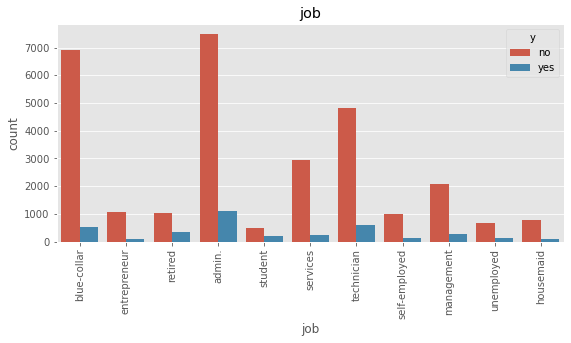

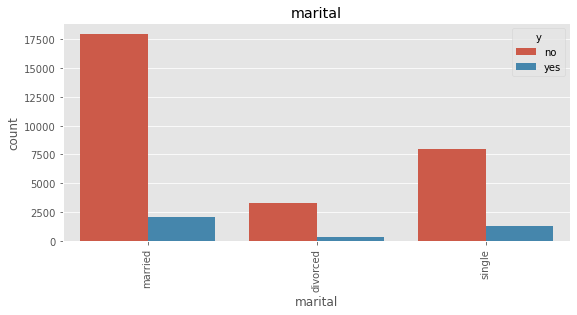

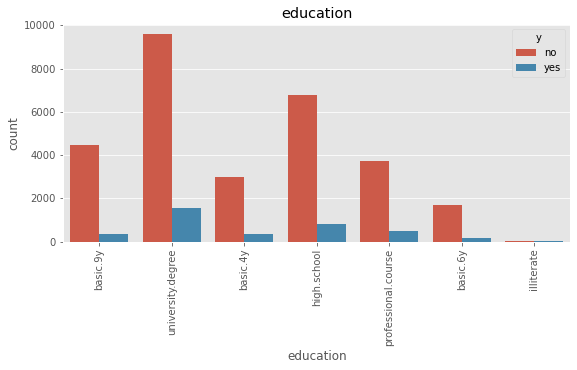

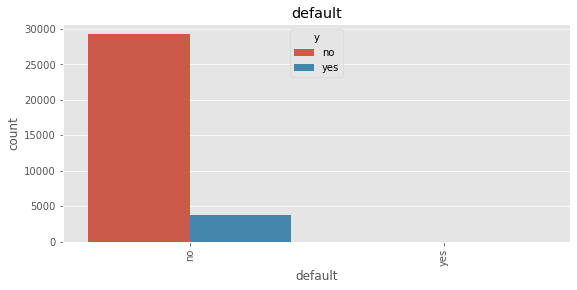

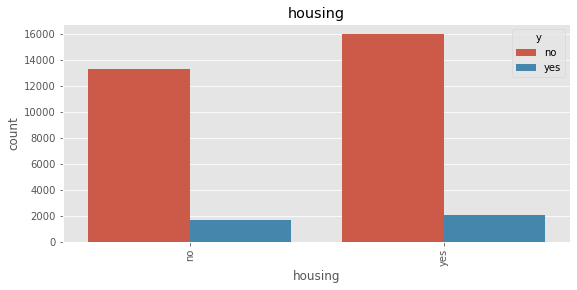

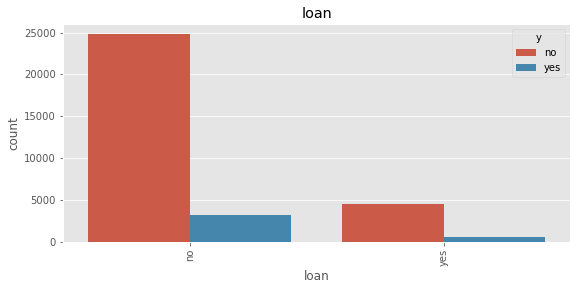

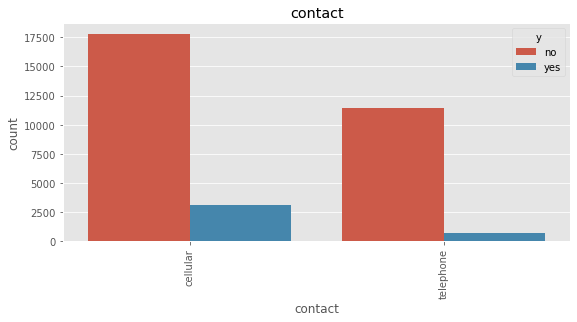

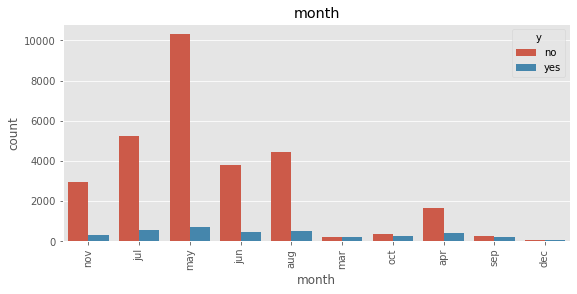

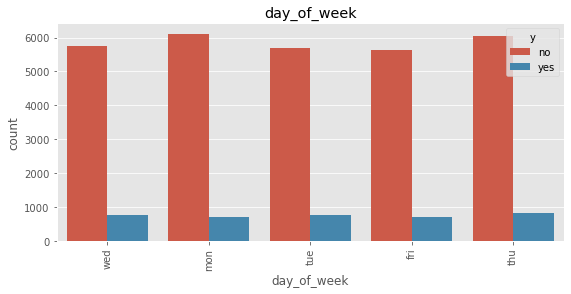

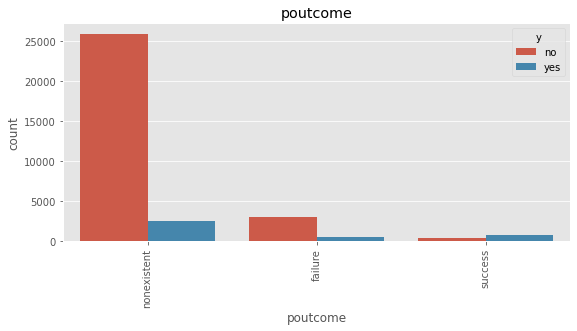

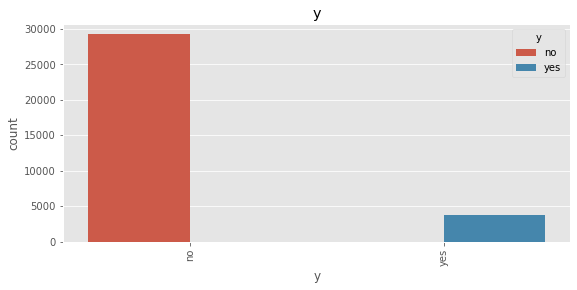

In [16]:


for column in categorical_col:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.countplot(x=dataframe[column],hue=dataframe['y'],data=dataframe)
    plt.title(column)    
    plt.xticks(rotation=90)

### Observations:

- The common traits seen for customers who have subscribed for the term deposit are :
    - Customers having administrative jobs form the majority amongst those who have subscirbed to the term deposit with technicians being the second majority.
    - They are married 
    - They hold a university degree
    - They do not hold a credit in default
    - Housing loan doesn't seem a priority to check for since an equal number of customers who have and have not subscribed to it seem to have subscribed to the term deposit.
    - Cell-phones should be the preferred mode of contact for contacting customers.

### Function to Label Encode Categorical variables

Before applying our machine learning algorithm, we need to recollect that any algorithm can only read numerical values. It is therefore essential to encode categorical features into numerical values. Encoding of categorical variables can be performed in two ways:
- Label Encoding
- One-Hot Encoding.

For the given dataset, we are going to label encode the categorical columns. 

- In the code below we will perform label encoding on all the categorical features and also the target (since it is categorical) in the  dataset. You can modify the below function in order to perform One-Hot Encoding as well.

In [17]:
# Initializing lable encoder
le = LabelEncoder()

# Initializing Label Encoder
le = LabelEncoder()

# Iterating through each of the categorical columns and label encoding them
for feature in categorical_col:
    try:
        dataframe[feature] = le.fit_transform(dataframe[feature])
    except:
        print('Error encoding '+feature)

In [18]:
dataframe.to_csv('../data/preprocessed_data.csv',index=False)

In [20]:
from pandas_profiling import ProfileReport
prof = ProfileReport(dataframe)
prof